In [51]:
import robot_plotter as rp
import models_functions as mf
import traj
import numpy as np
import matplotlib.pyplot as plt
import robot_sim as sim

In [ ]:
# generate reference trajectory
dt = 0.01
xa1 = np.zeros((mf.STATE_LEN, 1)); xa1[:6] = np.array([[-1.57],[0],[0.5],[5],[0.1],[-0.1]])
xb1 = np.zeros((mf.STATE_LEN, 1)); xb1[:6] = np.array([[0],[0],[6],[6.5],[0.2],[0]])
xc1 = np.zeros((mf.STATE_LEN, 1)); xc1[:6] = np.array([[-1.57],[0],[9.5],[4],[0],[-0.1]])

posa, y_IMUa = traj.gen_poly_traj(xa1, xb1, t0=0, tf=30, dt=dt)
posb, y_IMUb = traj.gen_poly_traj(xb1, xc1, t0=0, tf=30, dt=dt)
pos1 = np.append(posa[:,:-1], posb, axis=1) # Remember to remove repeated position!!
y_IMU1 = np.append(y_IMUa, y_IMUb, axis=1)

xa2 = np.zeros((mf.STATE_LEN, 1)); xa2[:6] = np.array([[0],[0],[0.5],[3],[0.1],[0]])
xb2 = np.zeros((mf.STATE_LEN, 1)); xb2[:6] = np.array([[3.14],[0],[7],[5],[-0.5],[0]])
xc2 = np.zeros((mf.STATE_LEN, 1)); xc2[:6] = np.array([[-1.57],[0],[3],[0.5],[0],[-0.1]])

posa, y_IMUa = traj.gen_poly_traj(xa2, xb2, t0=0, tf=30, dt=dt)
posb, y_IMUb = traj.gen_poly_traj(xb2, xc2, t0=0, tf=30, dt=dt)
pos2 = np.append(posa[:,:-1], posb, axis=1) # Remember to remove repeated position!!
y_IMU2 = np.append(y_IMUa, y_IMUb, axis=1)

xa3 = np.zeros((mf.STATE_LEN, 1)); xa3[:6] = np.array([[1.57],[0],[0.5],[0.5],[0],[0.1]])
xb3 = np.zeros((mf.STATE_LEN, 1)); xb3[:6] = np.array([[0],[0],[6],[2],[0],[-0.1]])
xc3 = np.zeros((mf.STATE_LEN, 1)); xc3[:6] = np.array([[-1.57],[0],[9],[3],[0],[0.1]])

posa, y_IMUa = traj.gen_poly_traj(xa3, xb3, t0=0, tf=30, dt=dt)
posb, y_IMUb = traj.gen_poly_traj(xb3, xc3, t0=0, tf=30, dt=dt)
pos3 = np.append(posa[:,:-1], posb, axis=1) # Remember to remove repeated position!!
y_IMU3 = np.append(y_IMUa, y_IMUb, axis=1)

pos_len = pos1.shape[1] # Assumes that all paths have the same length

# Generate anchors position:
xanc1 = np.zeros((mf.STATE_LEN, 1)); xanc1[mf.X_P] = np.array([[5],[4]])

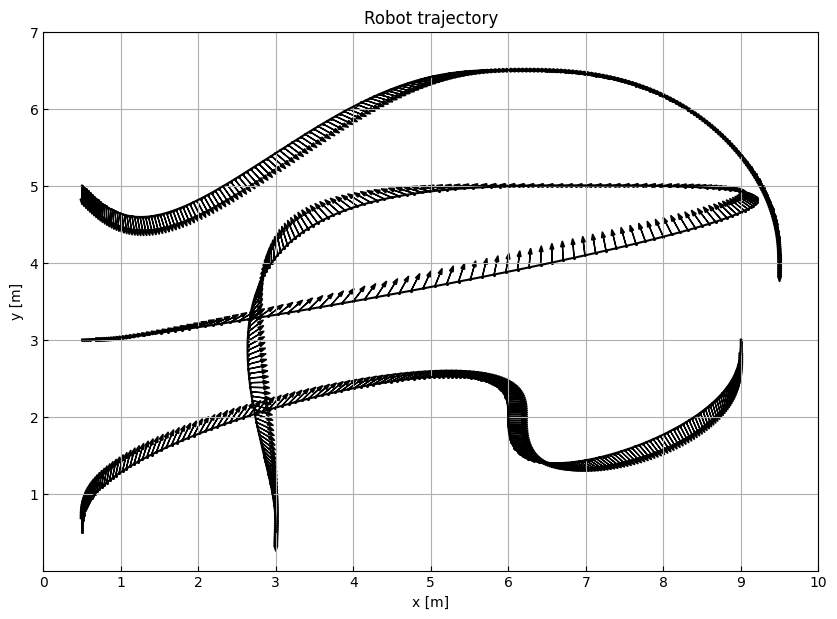

In [53]:
# Generate noise
R_b = 0.0009e-3
R_r = 0.001e-3
R_w = 0.0002
R_a = 0.004

Q=np.diag([0.1e6, 8.0e6, 8.0e6, 0.000001, 0.00001, 0.00001])
R=np.diag([R_b, R_r, R_w, R_a, R_a]) # approx vaules from datasheets
P=np.diag([0,0,0,0,0,0,0,0,0.000,0.0,0.0]) # Initialize with system noise for bias

np.random.seed(1000)
y_IMU1 = traj.gen_noise(y_IMU1, dt=1, sigma=np.diag([0, 0, 0]), bias=np.array([[0.0],[0.],[-0.]]))
y_IMU2 = traj.gen_noise(y_IMU2, dt=1, sigma=np.diag([0, 0, 0]), bias=np.array([[-0.0],[0.],[0.]]))
y_IMU3 = traj.gen_noise(y_IMU3, dt=1, sigma=np.diag([0, 0, 0]), bias=np.array([[0.0],[-0.],[0.]]))

# Preview plot:
fig, axtest = rp.setup_plot()
rp.plot_position(axtest, pos1[:,::25], color='black')
rp.plot_position(axtest, pos2[:,::25], color='black')
rp.plot_position(axtest, pos3[:,::25], color='black')

anchor1 = sim.Anchor(x0=xanc1)


In [48]:
# Run LUFT algorithm
robotL1 = sim.robot_luft(x0=xa1, path=pos1, imu=y_IMU1, dt=dt, Q=Q, R=R, P=P, id=111)
robotL2 = sim.robot_luft(x0=xa2, path=pos2, imu=y_IMU2, dt=dt, Q=Q, R=R, P=P, id=222)
robotL3 = sim.robot_luft(x0=xa3, path=pos3, imu=y_IMU3, dt=dt, Q=Q, R=R, P=P, id=333)

np.random.seed(0)
for i in range(pos_len-1):
    robotL1.predict()
    robotL2.predict()
    robotL3.predict()
    if (i > 0 and i % 1 == 0):
        print(i)
        robotL1.anchor_meas(anchor1, sr=0, sb=0)
        robotL2.robot_meas_luft(robotL1, sr=0, sb=0)
        robotL3.robot_meas_luft(robotL2, sr=0, sb=0)

1
Adding new robot: 222
Adding new robot: 111
Adding new robot: 333
Adding new robot: 222
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


KeyboardInterrupt: 

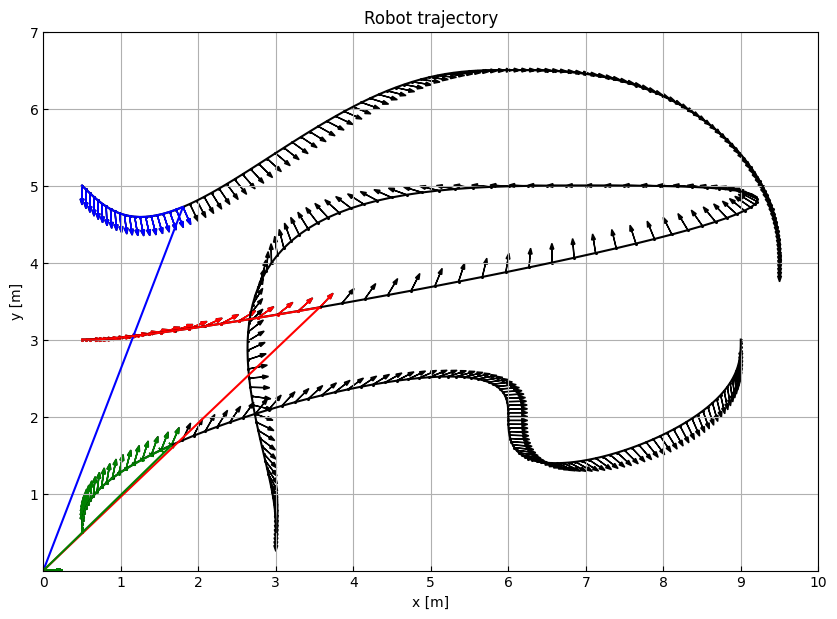

In [54]:
# Plot the quantuties we have logged:
x_logL1 = robotL1.x_log
P_logL1 = robotL1.P_log
x_logL2 = robotL2.x_log
P_logL2 = robotL2.P_log       
x_logL3 = robotL3.x_log
P_logL3 = robotL3.P_log 

# Plot ground truth
fig, ax = rp.setup_plot()
rp.plot_position(ax, pos1[:,::50], color='black')
rp.plot_position(ax, pos2[:,::50], color='black')
rp.plot_position(ax, pos3[:,::50], color='black')

# Plot states of robots:
rp.plot_position2(ax, x_logL1[:,::50], P_logL1[:,:,::50], color='blue')
rp.plot_position2(ax, x_logL2[:,::50], P_logL2[:,:,::50], color='red')
rp.plot_position2(ax, x_logL3[:,::50], P_logL3[:,:,::50], color='green')

In [57]:
# Run naive algorithm
# Setup robots and anchors:
robot1 = sim.Robot_single(x0=xa1, path=pos1, imu=y_IMU1, dt=dt, Q=Q, R=R, P=P)
robot2 = sim.Robot_single(x0=xa2, path=pos2, imu=y_IMU2, dt=dt, Q=Q, R=R, P=P)
robot3 = sim.Robot_single(x0=xa3, path=pos3, imu=y_IMU3, dt=dt, Q=Q, R=R, P=P)

np.random.seed(0)
for i in range(pos_len-1):
    robot1.predict()
    robot2.predict()
    robot3.predict()
    if (i > 0 and i % 1 == 0):
        print(i)
        robot1.anchor_meas(anchor1, sr=0, sb=0)
        robot2.anchor_meas(anchor1, sr=0, sb=0)
        robot3.anchor_meas(anchor1, sr=0, sb=0)
        #robot2.robot_meas(robot1, sr=0, sb=0)
        #robot3.robot_meas(robot2, sr=0, sb=0)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


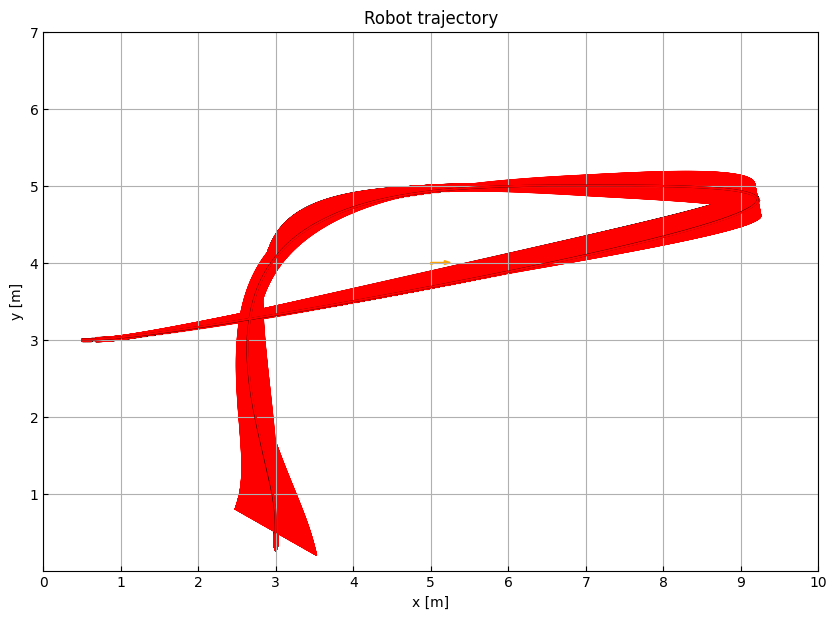

In [ ]:
# Plot the quantuties we have logged:
x_log1 = robot1.x_log
P_log1 = robot1.P_log
x_log2 = robot2.x_log
P_log2 = robot2.P_log       
x_log3 = robot3.x_log
P_log3 = robot3.P_log 

# Plot ground truth
fig, ax = rp.setup_plot()
rp.plot_position(ax, pos1[:,::50], color='black')
rp.plot_position(ax, pos2[:,::50], color='black')
rp.plot_position(ax, pos3[:,::50], color='black')

# Plot states of robots:
rp.plot_position2(ax, x_log1[:,::50], P_log1[:,:,::50], color='blue')
rp.plot_position2(ax, x_log2[:,::50], P_log2[:,:,::50], color='red')
rp.plot_position2(ax, x_log3[:,::50], P_log3[:,:,::50], color='green')

# Plot anchors
anchor1.draw_position(ax, color='orange')

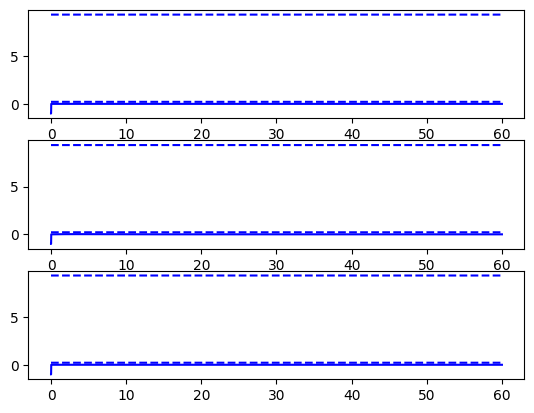

In [59]:
# NEES analysis
# If higher than confidence interval, then the estimate is overconfident
fig, axs = plt.subplots(3)
pos_ind = [0, 2, 3]
rp.plot_NEES(axs[0], 
             x_est=x_log1[pos_ind,:],
             x_true=robot1.path[:3,:], 
             P=P_log1[np.ix_(pos_ind, pos_ind)], 
             dt=dt,
             prob=0.95)
rp.plot_NEES(axs[1], 
             x_est=x_log2[pos_ind,:],
             x_true=robot2.path[:3,:], 
             P=P_log2[np.ix_(pos_ind, pos_ind)], 
             dt=dt,
             prob=0.95)
rp.plot_NEES(axs[2], 
             x_est=x_log3[pos_ind,:],
             x_true=robot3.path[:3,:], 
             P=P_log3[np.ix_(pos_ind, pos_ind)], 
             dt=dt,
             prob=0.95)

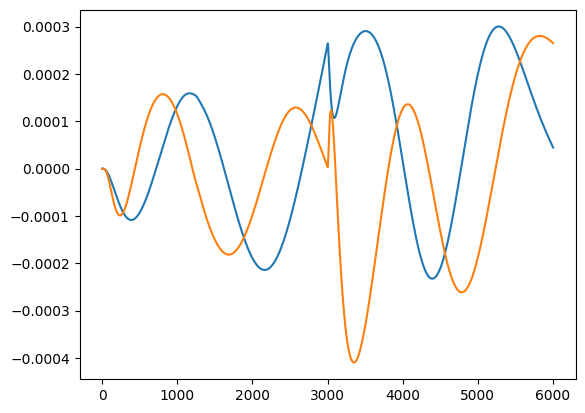

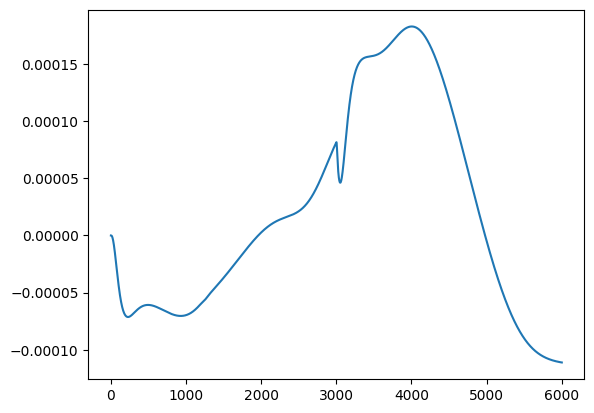

In [60]:
# Plot bias states:
# For acc:
plt.figure()
plt.plot(x_log2[9,:])
plt.plot(x_log2[10,:])
plt.figure()
plt.plot(x_log2[8,:])